In [14]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [16]:
conn = sqlite3.connect("../data/vnexpress.db")
df = pd.read_sql_query("SELECT * FROM article", conn)
conn.close()

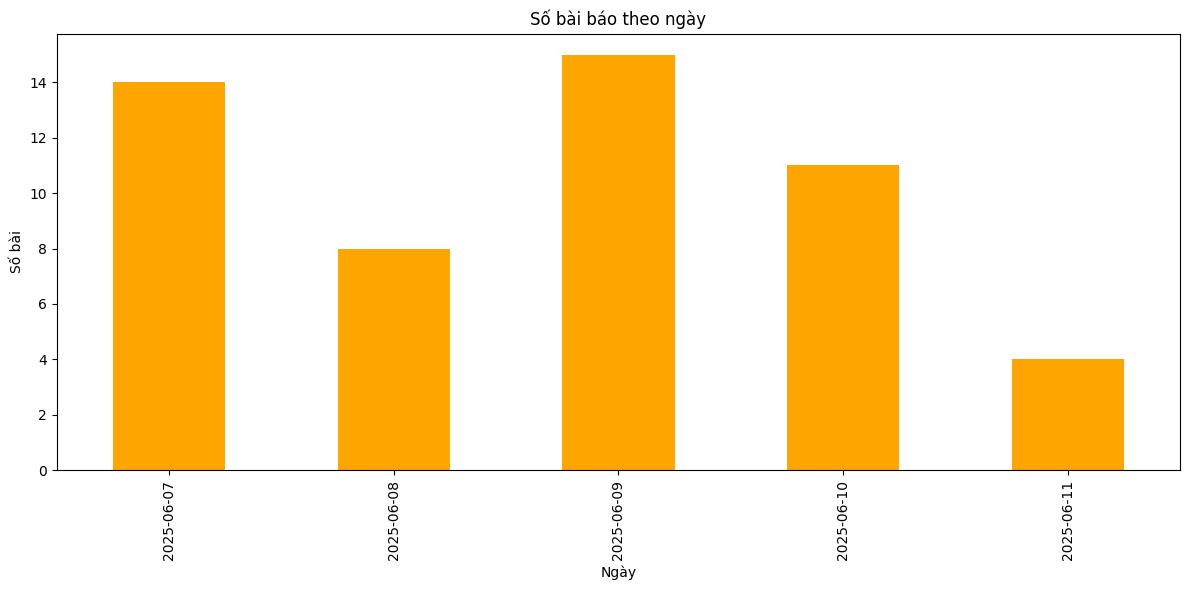

In [18]:
df["date"] = pd.to_datetime(df["time"]).dt.date
df_by_date = df.groupby("date").size()
df_by_date.plot(kind="bar", figsize=(12,6), title="Số bài báo theo ngày", color="orange")
plt.xlabel("Ngày")
plt.ylabel("Số bài")
plt.tight_layout()